# Bosques Aleatorios

### Es un metodo ensamblador por lo que su importacion se realiza desde metodos de enamble en scikitlearn

* Funciona tanto para regresion como para clasificacion
* Combina muchos arboles de decision y los combina para obtener una prediccion mas confiable
* Selecciona al azar caracteristicas de datos para hacer diferentes arboles aleatoriamente
* Evita el sobreajuste al toamr diferentes caracteristicas a evaluar

### Deficiencias
* El algoritmo es lento si tiene muchos arboles haciendolo deficiente para problemas en tiempo real

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#IMPORTANDO LOS DATOS
casas = pd.read_csv("train.csv", sep=",")
casas.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Eliminando los registros con "GarageArea = 0"

In [3]:
casas = casas.drop(casas[casas["GarageArea"]==0].index) #Recordar que drop elimina por indices

--------------------------------------------------
# Definicion de datos y Modelo

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(casas["GarageArea"], casas["SalePrice"],test_size=0.3)

#PARA ESTA FUNCION X SE PASA EN 2D Y "Y" EN 1D
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [5]:
#Graficando los datos
#plt.scatter(x_train, y_train)
#plt.scatter(x_test, y_test)

# Modelo

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
#Se define el modelo a usar
bar = RandomForestRegressor(n_estimators=300, max_depth=10) # n_estimators= nro de arboles, a mas mejoran los resultados pero cae el rendimiento
                                                           # max_depth = Profundidad del arbol (nodos)

## Entrenamiento y Modelado

In [8]:
#Entrenamiento
bar.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300)

In [9]:
#Prediccion
y_predict = bar.predict(x_test)

## Graficando los resultados

Text(0.5, 1.0, 'Area del Inmueble vs Precio de Venta')

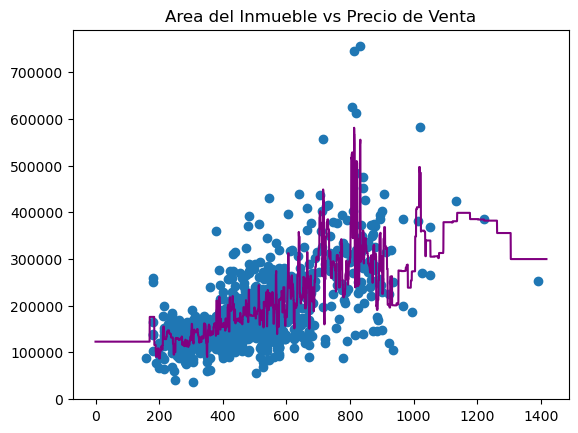

In [10]:
#Graficando la curva de prediccion
x_arbol = np.arange(0,x_test.max(),0.5)
x_arbol = x_arbol.reshape(-1,1)
plt.plot(x_arbol, bar.predict(x_arbol), color="purple")

#Garficando los datos
plt.scatter(x_train, y_train)
plt.title("Area del Inmueble vs Precio de Venta")

## Prediccion del Modelo

In [11]:
bar.score(x_train, y_train)

0.7197313835983064